# House_Prediction Dataset
**Dataset Description：** The dataset contains the house measurements like living area, Site measurements etc. Using a housing dataset to predict the price of a house based on its features such as size, location, and number of rooms. The task of the project is to predict the price of the house a buyer can get the price of the house based on a number of features of the house.  This is a typical regression problem and this notebook demonstrate hoe to predict the housing price using dataset to decide whether a buyer can afford based on the pricing features.

**Dataset Detail Information*
The dataset contains 21613 records in total. Every record has 21 features and 1 label which are described as below.
1. Date: This feature consists of the date the property was sold
2. Price: This gives the total price the property was sold
3. Bedrooms: Number of bedroom the property has
4. Bathrooms: number of bathrooms
5. sqrt_living: living area
6. sqrt_lot:
7. Floors: number of floors
8. sqft_basment: Area of the basement
9. Yr_build: year which the property was built 
10. yr_renovated: year in which it was renovated
11. zipcode

These are few useful features we will be using in this protfolio

**Learning taks:**
1. Data should be preprocessed and cleaned based on the requirments such as split the string of date only to integer value
2. Feature selection should be conducted to remove irrelevant features.
3. Train a logistic regression model to predict price of house by using the other 20 features.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
Data = pd.read_csv('data_house.csv')
Data.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21613 non-null  int64  
 5   bathrooms      21613 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

Here we can see that there are no null values or empty spaces in this data set that we need to fill a value with but this dataset has few of the features which we will not be using in our portfolio.

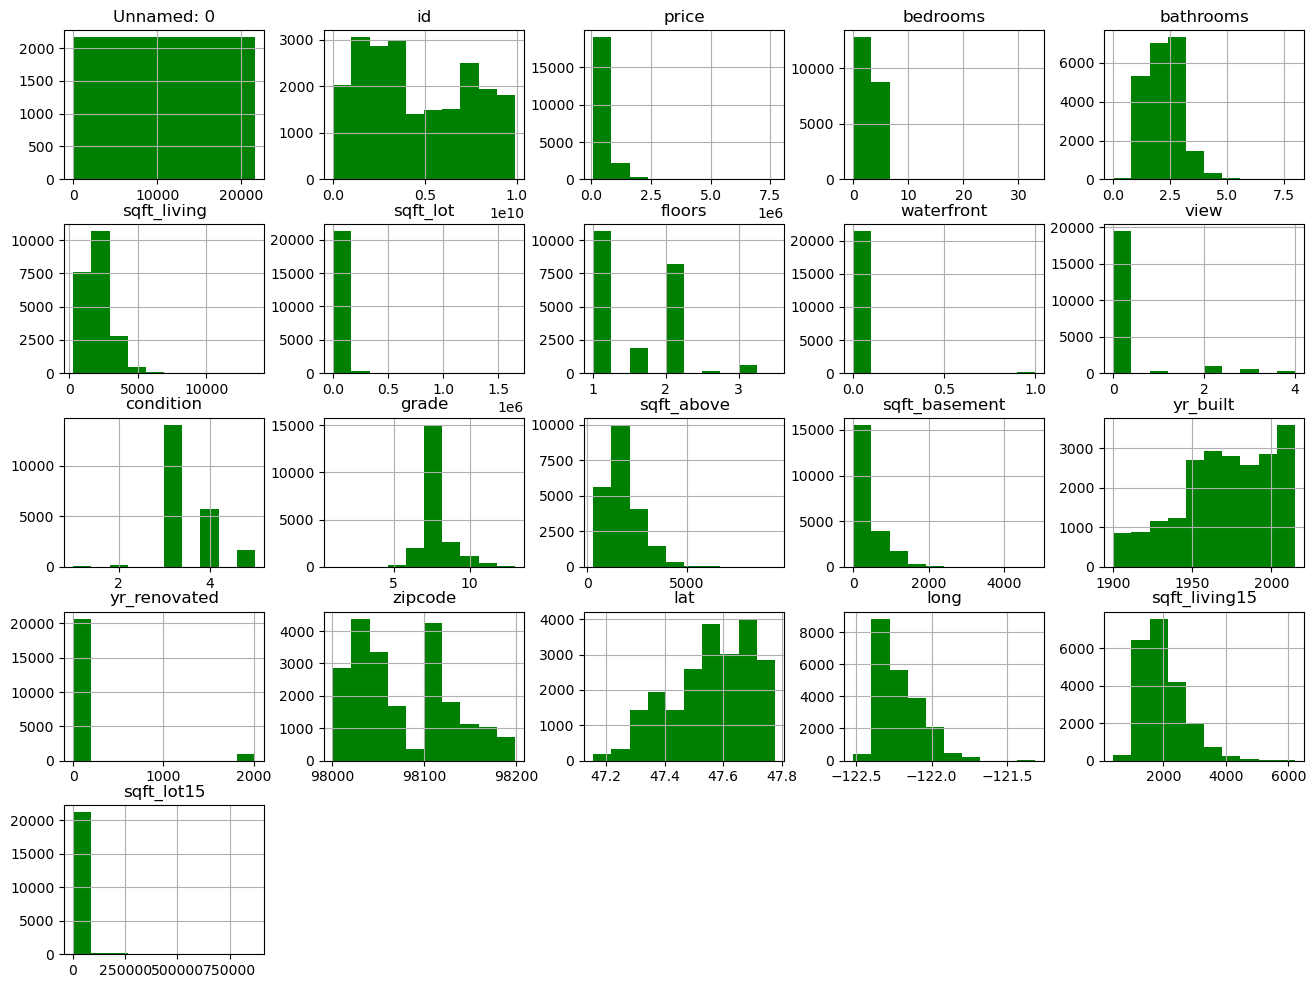

In [4]:
Data.hist(bins=10 ,figsize=(16,12), color = 'Green')
plt.show()

Using this graphical visualisation we are going to remove few outliers from the data

In [5]:
uniqueFloor = Data["floors"].value_counts()
print(uniqueFloor)
uniqueBedrooms = Data["bedrooms"].value_counts()
print(uniqueBedrooms)

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


Here we will remove outliers from floors and bedrooms column, 
For floors we will remove the houses which have more than 3 floors
And for bedrooms we will remove the houses which has 0 bedrooms and the once which have more than 7 bedrooms

In [6]:
floors = uniqueFloor[uniqueFloor > 3.4]
bedrooms = uniqueBedrooms[uniqueBedrooms>7]

bedrooms = bedrooms.index.tolist()
floors = floors.index.tolist()
print(floors)
print(bedrooms)

[1.0, 2.0, 1.5, 3.0, 2.5, 3.5]
[3, 4, 2, 5, 6, 1, 7, 0, 8]


In [7]:
filter_data = Data[Data['floors'].isin(floors)]
filter_data1 = filter_data[filter_data['bedrooms'].isin(bedrooms)]

filter_data1["date"]= filter_data1["date"].str.split("T").str[0]
filter_data1["date"] = filter_data1["date"].astype(int)

filter_data1 = filter_data1.drop(columns=["waterfront", "yr_renovated", "lat", "long", "view"])
print(filter_data1)

       Unnamed: 0          id      date     price  bedrooms  bathrooms  \
0               0  7129300520  20141013  221900.0         3       1.00   
1               1  6414100192  20141209  538000.0         3       2.25   
2               2  5631500400  20150225  180000.0         2       1.00   
3               3  2487200875  20141209  604000.0         4       3.00   
4               4  1954400510  20150218  510000.0         3       2.00   
...           ...         ...       ...       ...       ...        ...   
21608       21608   263000018  20140521  360000.0         3       2.50   
21609       21609  6600060120  20150223  400000.0         4       2.50   
21610       21610  1523300141  20140623  402101.0         2       0.75   
21611       21611   291310100  20150116  400000.0         3       2.50   
21612       21612  1523300157  20141015  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  condition  grade  sqft_above  \
0             1180      5650     1.0     

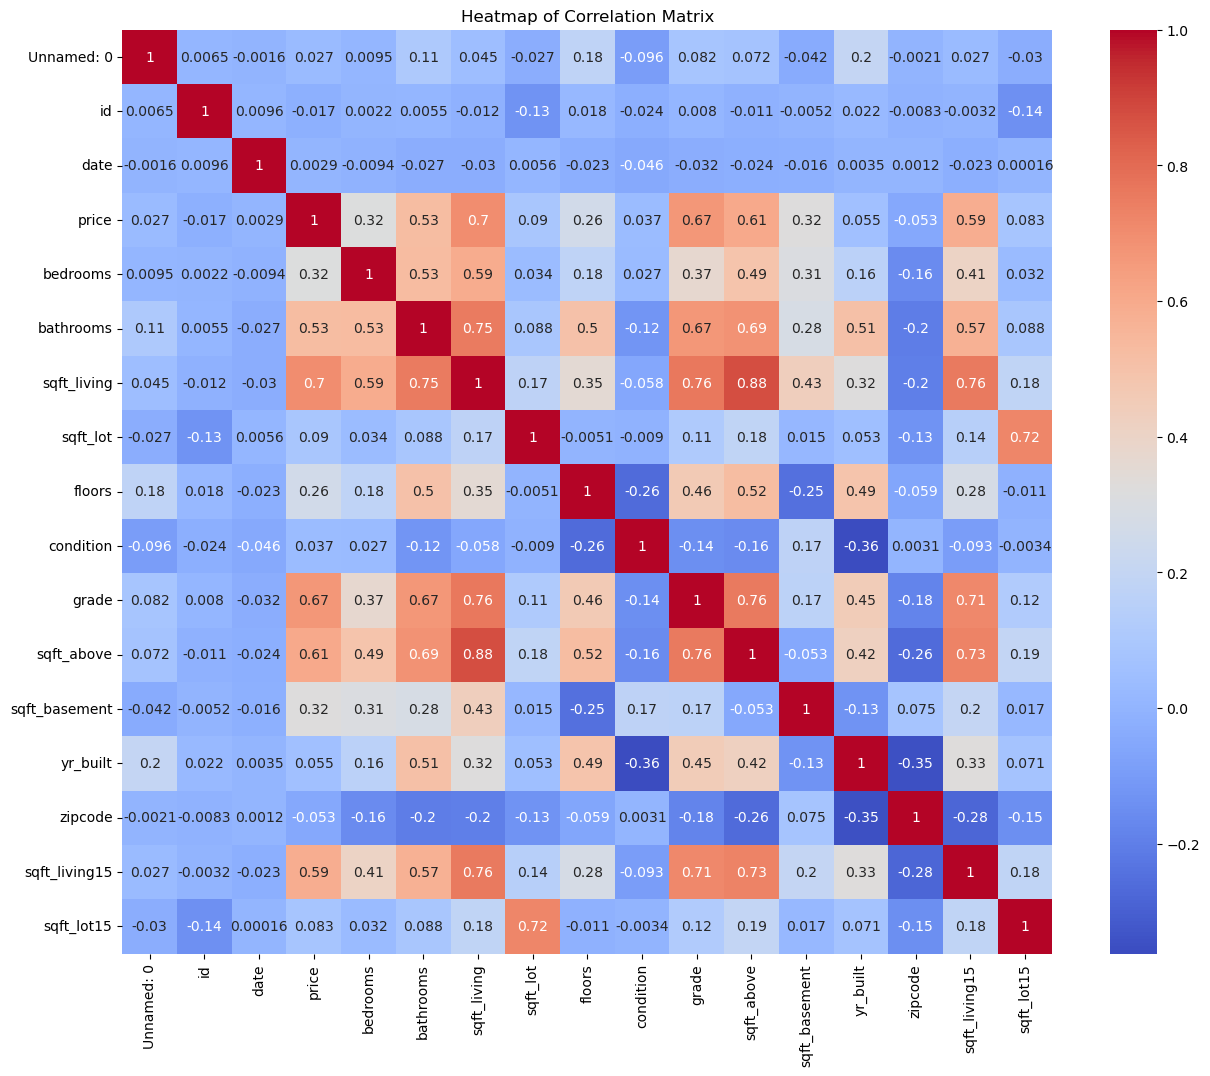

In [27]:
correlation_mat = filter_data1.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_mat, cmap='coolwarm', annot=True)
plt.title("Heatmap of Correlation Matrix")
plt.show()

Here for predicting price, few of the features have high positive correlation. Few of them are Number of bedroom, number of bathrooms, living area, number of floors, grade, area of the roof. Price of the house depends on these features. 

Data Classification
We classify all data records into training set (90%) and test set (10%) so that we can determine hyper-parameters with k-cross validation.

Sort all records by an ascending order of 'date'. and select the first 90% as the training and validation sets. The rest 10% will be used as the test set.

In [75]:
from sklearn.model_selection import train_test_split
New_Data = filter_data1.sort_values(by=['date'])
print(New_Data)

       Unnamed: 0          id      date      price  bedrooms  bathrooms  \
2487         2487  7525100520  20140502   335000.0         2       2.00   
17055       17055  5561000920  20140502   630000.0         4       2.75   
5657         5657  2207200675  20140502   419000.0         3       1.50   
2580         2580  2591720070  20140502   482000.0         4       2.50   
3723         3723  7739100015  20140502   463000.0         3       1.75   
...           ...         ...       ...        ...       ...        ...   
928           928  8730000270  20150514   359000.0         2       2.75   
7898         7898  1422700040  20150514   183000.0         3       1.00   
5637         5637  7923600250  20150515   450000.0         5       2.00   
13053       13053  5101400871  20150524   445500.0         2       1.75   
16594       16594  9106000005  20150527  1310000.0         4       2.25   

       sqft_living  sqft_lot  floors  condition  grade  sqft_above  \
2487          1350      2560 

In [56]:
#New_Data.copy().drop(columns=['Unnamed: 0','price','id', 'date', 'sqft_lot','condition', 'zipcode', 'sqft_lot15', 'grade', 'sqft_basement'])

In [169]:
#X is independent variable where we are giving features of the model
col = ['bedrooms', 'bathrooms', 'sqft_living', 'grade','sqft_lot15', 'sqft_living15', 'floors', 'yr_built','zipcode', 'sqft_above','sqft_basement']
X = New_Data[col]
X.head()

,bedrooms,bathrooms,sqft_living,grade,sqft_lot15,sqft_living15,floors,yr_built,zipcode,sqft_above,sqft_basement
2487,2,2.00,1350,8,2560,1790,1.0,1976,98052,1350,0
17055,4,2.75,2710,9,39299,2390,2.0,2000,98027,2710,0
5657,3,1.50,1570,7,7300,1570,1.0,1956,98007,1570,0
2580,4,2.50,2710,9,36224,2780,2.0,1989,98038,2710,0
3723,3,1.75,1710,7,8839,2260,1.0,1948,98155,1710,0


In [170]:
#y is price where it is considered as dependent variable
y = New_Data.price

In [171]:
#Dividing the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
from sklearn.linear_model import LinearRegression
 
# define model for multiple regression
model = LinearRegression()

In [174]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
model.fit(X_train, y_train)
predicted = model.predict(X_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
rmse = np.sqrt(mean_squared_error(y_test,predicted))
print("mse:", mse)
print("R Squared:", r2)
print("RMSE: ", rmse)

mse: 46553373858.431435
R Squared: 0.6234620352943798
RMSE:  215762.30870666786


Here R2 score tells the amount of variance a dependent variable has with respect to independent variable. Here we have 0.62346 which 62%.

MSE measures the average squared difference between the predicted and actual values in a dataset. Here the MSE is very high hence the regression model doesnt give us the prefect predictions 

In [164]:
from sklearn.neighbors import KNeighborsRegressor

reg_knn = KNeighborsRegressor(n_neighbors=5)
reg_knn.fit(X_train, y_train)

KNeighborsRegressor()

In [165]:
reg_knn.score(X_test, y_test)

0.5775950443395406

K Nearest Neighbor make use of closest distance to make predictions about the grouping

In [167]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 9}

In [168]:
from sklearn.metrics import r2_score

def mean_abs_error(y, preds):
    return np.mean(np.abs(y - preds))

def root_mean_squared_error(y, preds):
    return np.sqrt(np.mean(np.square(y - preds)))
 
reg_knn_preds = reg_knn.predict(X_test)

mae = mean_abs_error(y_test, reg_knn_preds)

rmse = root_mean_squared_error(y_test, reg_knn_preds)

r2score = r2_score(y_test, reg_knn_preds)

reg_knn_preds_train = reg_knn.predict(X_train)
m_train = mean_abs_error(y_train, reg_knn_preds_train)
rm_train = root_mean_squared_error(y_train, reg_knn_preds_train)

print("the mean abs error of the train model is {}".format(m_train))
print("the root mean squared error of the train model is {}".format(rm_train))
print("the mean abs error of the model is {}".format(mae))
print("the root mean squared error of the model is {}".format(rmse))
print("the r2 score of the model is {}".format(r2score))

the mean abs error of the model is 123939.6426017012
the root mean squared error of the model is 201329.35749145263
the mean abs error of the model is 148218.68701689426
the root mean squared error of the model is 228526.04180293423
the r2 score of the model is 0.5775950443395406


In [ ]:
Here the R2 value is 